In [1]:
# Import the necessary packages
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import seaborn as sns
import plotly.io as pio
import numpy as np

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('df_1999_2021_2.csv')
df

,Borough,Year,Crime rate,Primary & Utilities,Manufacturing,Construction,Wholesale,Retail,Transportation and Storage,Accomodation and food service activities,...,Population per hectare,Life expectancy of men at 65,Life expectancy of women at 65,% of Public sector jobs,% of Private sector jobs,Proportion of seats won by Conservatives,Proportion of seats won by Labour,Proportion of seats won by Liberal Democrats,Consumer expenditure on Alcoholic beverages (£mn),Consumer expenditure on Pubs and Wine bars (£mn)
0,Barking and Dagenham,1999,120.5,0.815000,30.797000,4.529000,7.246000,8.152000,9.058000,4.076000,...,45.0,16.289474,19.384211,20.490909,79.509091,0.0,100.0,0.0,19.793610,30.920531
1,Barnet,1999,98.0,0.694000,4.337000,4.337000,7.806000,15.611000,4.337000,6.938000,...,36.1,18.847368,21.410526,18.445455,81.554545,50.8,47.6,1.6,60.159765,114.874726
2,Bexley,1999,95.1,2.596000,11.869000,6.677000,7.418000,13.353000,3.338000,5.935000,...,35.9,17.915789,20.700000,16.381818,83.618182,71.4,23.8,0.0,23.477447,36.044944
3,Brent,1999,127.7,2.571000,9.254000,7.198000,13.368000,12.339000,6.170000,6.170000,...,60.2,18.300000,21.642105,18.900000,81.100000,9.5,88.9,1.6,46.074271,84.845053
4,Bromley,1999,89.8,0.877000,4.871000,7.793000,5.845000,15.587000,4.384000,5.845000,...,19.6,18.468421,21.284211,15.918182,84.081818,85.0,11.7,0.0,53.105324,92.961117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Sutton,2021,62.0,0.405909,3.748364,7.647500,5.291727,11.284682,5.294500,4.922364,...,48.7,18.068421,20.436842,20.363636,79.636364,16.7,0.0,83.3,47.169628,72.416762
732,Tower Hamlets,2021,97.0,0.426182,3.156727,2.680136,3.345455,3.586318,2.956455,5.033909,...,167.6,16.305263,19.357895,16.954545,83.045455,11.1,48.9,0.0,79.618725,135.643491
733,Waltham Forest,2021,79.0,0.947455,6.222045,5.022318,7.387864,12.119909,4.352000,4.925000,...,75.4,17.231579,20.236842,23.800000,76.200000,26.7,73.3,0.0,26.224553,40.093251
734,Wandsworth,2021,75.0,0.548364,2.574045,3.408000,5.595955,10.836682,4.160182,8.038227,...,98.6,17.152632,20.194737,22.109091,77.890909,68.3,31.7,0.0,122.273988,209.901113


## Finding the optimal regressor score

The random_state parameter is a seed value used to initialize the random number generator for various operations in machine learning algorithms. It is used to ensure that the results of these operations are reproducible, meaning that they will be the same every time the algorithm is run with the same seed value. In the context of a random forest model, the random_state parameter can be used to specify the seed value used to generate the random sampling of features and observations when building the individual trees in the forest. It is important to note that the random_state parameter does not determine the final predictions made by the model, but rather the process by which the model is trained.

The aim of the code below to optimize the model's score() by iterating over a range of different random states for both the train-test split and the random forest regressor. In general, as the score of the model increases, the model is making more accurate predictions. This can in turn suggests that the borough-attribute importance scores are more reliable, as they are based on a model that is performing well.

To begin, we split our data into features (X) and the target variable (y) and create an empty DataFrame to store our results. We then start a timer to measure the elapsed time.

Next, we start the outer loop, which iterates over 101 different random states for the train-test split. For each iteration, we split the data into training and testing sets using the train_test_split() function from scikit-learn, with the test set size set to 20% of the total data and the random state specified by the current iteration. Then, we start the inner loop, which iterates over 101 different random states for the random forest regressor. This means we execute our ramdom forest regressor object 10,200 times, each time with a unique combination of random_states, yielding different model scores. 

The RandomForestRegressor() function within each inner loop, has the hyperparameter's n_estimators = 50,  max_features = 'auto', and max_depth = 40. The value of 50 for n_estimators was chosen because it strikes a good balance between accuracy and computational efficiency. A larger value for n_estimators generally leads to better performance, but it also increases the computational time required to train the model. The choice to set max_features to 'auto' was made because it is default value that can help to prevent overfitting and improve the generalization performance of the model. The value of 40 for max_depth was chosen in order to build a model with good performance without overfitting. A deeper tree can lead to better performance on the training data, but it can also increase the risk of overfitting. We increased the n_estimators and max_depth for the 1999_2021 dataset as this data set had a lot more data. Chosing these parameters was informed by: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d.

After each iteration, we store the seeds from our relevant functions, and the regressor score in a DataFrame and concatenate it with the results DataFrame from previous iterations. This is with the aim of finding the maximum regressor score recorded, then using the recorded random_states to reproduce the results later in order to find the corresponding "importance" scores for our boroigh features.

Finally, we stop the timer and calculate the elapsed time, which we print to the screen in minutes. This allows us to see how long it took to run all of the iterations and find the optimal regressor score.

### Do not re-run the following cell

In [37]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=['random_state_test_split','random_state_rf', 'score'])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Borough','Year','Crime rate'], axis=1)
y = df['Crime rate']

# Start the timer
start_time = time.time()

for random_state_test_split in range(101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_test_split)
    for random_state_rf in range(101):
        # Create a RandomForestRegressor object
        regressor = RandomForestRegressor(n_estimators = 50, max_features = 'auto', max_depth = 40, random_state= random_state_rf)

        # Train the model on the training data
        regressor.fit(X_train, y_train)

        # Make predictions on the test data
        predictions = regressor.predict(X_test)

        # Evaluate the model performance
        regressor_score = regressor.score(X_test, y_test)

        # Create a new DataFrame for the current iteration
        df1 = pd.DataFrame({'random_state_test_split': random_state_test_split, 'random_state_rf': random_state_rf, 'score': regressor_score}, index=[i])

        # Append the DataFrame to the results DataFrame
        results_df = pd.concat([results_df, df1])


# Print the results DataFrame
results_df= results_df.reset_index(drop=True)
display(results_df)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

elapsed_time= round(elapsed_time/60)
# Print the elapsed time
print(f"Elapsed time: {elapsed_time} minutes")
results_df.to_csv('random_state_combination_df_1999_2021.csv', index=False)


,random_state_test_split,random_state_rf,score
0,0,0,0.924517
1,0,1,0.925051
2,0,2,0.914165
3,0,3,0.922328
4,0,4,0.921826
...,...,...,...
10196,100,96,0.923329
10197,100,97,0.929516
10198,100,98,0.926615
10199,100,99,0.917985


Elapsed time: 95 minutes


The code above took 95 minutes to execute. We now save the df as a csv and then start analyzing the table to find the optimal regressor score.

In [3]:
random_state_combination_df_1999_2021= pd.read_csv('random_state_combination_df_1999_2021.csv')

In [4]:

# Find the maximum score
max_score = random_state_combination_df_1999_2021['score'].max()

# Get the index of the row where the maximum score occurs
max_index = random_state_combination_df_1999_2021.index[random_state_combination_df_1999_2021['score'] == max_score]
max_index= max_index[0]
# Print the index of the maximum score row
print(f'The index of the maximum score is {max_index}')

The index of the maximum score is 8291


In [5]:
#Display the row that has the maximum score
display(random_state_combination_df_1999_2021.loc[max_index])

random_state_test_split    82.000000
random_state_rf             9.000000
score                       0.963994
Name: 8291, dtype: float64

## Visualize our score data

We want to understand what the nature of how our model did over the 10,200 itterations. TO do this we can visualize our score data using a boxplot

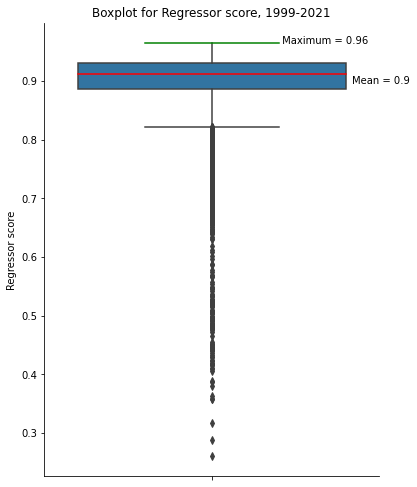

In [6]:

# Create a boxplot using seaborn
bp = sns.boxplot(y=random_state_combination_df_1999_2021['score'])


# Add axis labels and a title
plt.ylabel('Regressor score')
plt.title('Boxplot for Regressor score, 1999-2021')

# Set the visibility of some of the outline to False
bp.spines['top'].set_visible(False)
bp.spines['right'].set_visible(False)

# Increase the space between the title and the boxplot
plt.subplots_adjust(top=1.7)


# Get the y-values for the quartiles
max_ = random_state_combination_df_1999_2021['score'].max()
mean = random_state_combination_df_1999_2021['score'].mean()

# Change the color of the Mean line to red
bp.lines[4].set_color('red')

# Change the color of the Maximum line to green
bp.lines[3].set_color('green')


# Add text labels to the plot
plt.text(x=0.2, y=max_, s=f' Maximum = {round(max_,2)}')
plt.text(x=0.42, y=mean, s=f'Mean = {round(mean,2)}')


# Display the plot
plt.show()



In [7]:
# Get summary statistics of the data
min_ = random_state_combination_df_1999_2021['score'].min()
q1 = random_state_combination_df_1999_2021['score'].quantile(0.25)
mean = random_state_combination_df_1999_2021['score'].mean()
q3 = random_state_combination_df_1999_2021['score'].quantile(0.75)
max_ = random_state_combination_df_1999_2021['score'].max()


print(f"Minimum = {round(min_, 2)}")
print(f"First quartile = {round(q1, 2)}")
print(f"Mean = {round(mean, 2)}")
print(f"Third quartile = {round(q3, 2)}")
print(f"Maximum = {round(max_, 2)}")

Minimum = 0.26
First quartile = 0.89
Mean = 0.9
Third quartile = 0.93
Maximum = 0.96


## Rename the Job's per sector columns

In [8]:
column_names = ['Primary & Utilities', 'Manufacturing',       'Construction', 'Wholesale', 'Retail', 'Transportation and Storage',       'Accomodation and food service activities',       'Information and Communication', 'Financial and insurance activities',       'Professional, Real Estate, Scientific and technical activities',       'Administrative and support service activities',       'Public Admin and defence', 'Education', 'Health',       'Arts, entertainment and recreation', 'Other services']

df = df.rename(columns={column: f'% of {column} workers' for column in column_names})
df

,Borough,Year,Crime rate,% of Primary & Utilities workers,% of Manufacturing workers,% of Construction workers,% of Wholesale workers,% of Retail workers,% of Transportation and Storage workers,% of Accomodation and food service activities workers,...,Population per hectare,Life expectancy of men at 65,Life expectancy of women at 65,% of Public sector jobs,% of Private sector jobs,Proportion of seats won by Conservatives,Proportion of seats won by Labour,Proportion of seats won by Liberal Democrats,Consumer expenditure on Alcoholic beverages (£mn),Consumer expenditure on Pubs and Wine bars (£mn)
0,Barking and Dagenham,1999,120.5,0.815000,30.797000,4.529000,7.246000,8.152000,9.058000,4.076000,...,45.0,16.289474,19.384211,20.490909,79.509091,0.0,100.0,0.0,19.793610,30.920531
1,Barnet,1999,98.0,0.694000,4.337000,4.337000,7.806000,15.611000,4.337000,6.938000,...,36.1,18.847368,21.410526,18.445455,81.554545,50.8,47.6,1.6,60.159765,114.874726
2,Bexley,1999,95.1,2.596000,11.869000,6.677000,7.418000,13.353000,3.338000,5.935000,...,35.9,17.915789,20.700000,16.381818,83.618182,71.4,23.8,0.0,23.477447,36.044944
3,Brent,1999,127.7,2.571000,9.254000,7.198000,13.368000,12.339000,6.170000,6.170000,...,60.2,18.300000,21.642105,18.900000,81.100000,9.5,88.9,1.6,46.074271,84.845053
4,Bromley,1999,89.8,0.877000,4.871000,7.793000,5.845000,15.587000,4.384000,5.845000,...,19.6,18.468421,21.284211,15.918182,84.081818,85.0,11.7,0.0,53.105324,92.961117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Sutton,2021,62.0,0.405909,3.748364,7.647500,5.291727,11.284682,5.294500,4.922364,...,48.7,18.068421,20.436842,20.363636,79.636364,16.7,0.0,83.3,47.169628,72.416762
732,Tower Hamlets,2021,97.0,0.426182,3.156727,2.680136,3.345455,3.586318,2.956455,5.033909,...,167.6,16.305263,19.357895,16.954545,83.045455,11.1,48.9,0.0,79.618725,135.643491
733,Waltham Forest,2021,79.0,0.947455,6.222045,5.022318,7.387864,12.119909,4.352000,4.925000,...,75.4,17.231579,20.236842,23.800000,76.200000,26.7,73.3,0.0,26.224553,40.093251
734,Wandsworth,2021,75.0,0.548364,2.574045,3.408000,5.595955,10.836682,4.160182,8.038227,...,98.6,17.152632,20.194737,22.109091,77.890909,68.3,31.7,0.0,122.273988,209.901113


## Use the optimized random state's

To reproduce the optimal regressor score, we can set the random_state parameters to the corrsponding values we found above (i.e. the random seeds that generated the maximum score).

In [9]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Borough','Year','Crime rate'], axis=1)
y = df['Crime rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# Create a RandomForestRegressor object
regressor = RandomForestRegressor(n_estimators = 40, max_features = 'auto', max_depth = 30, random_state= 9)


# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions = regressor.predict(X_test)


In [10]:
# Evaluate the model performance
regressor_score= regressor.score(X_test, y_test)
print(f"The regressor.score is {regressor_score}")
# Get the feature importances
importances = regressor.feature_importances_

print("")
# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f'{col}: {importances[i]}')


The regressor.score is 0.9636977644011028

% of Primary & Utilities workers: 0.0036300400775677527
% of Manufacturing workers: 0.03447704184669269
% of Construction workers: 0.009283015865601464
% of Wholesale workers: 0.00944611048493943
% of Retail workers: 0.00589559941922008
% of Transportation and Storage workers: 0.016652689167924666
% of Accomodation and food service activities workers: 0.04138333192222088
% of Information and Communication workers: 0.012706425206270848
% of Financial and insurance activities workers: 0.007642478794369673
% of Professional, Real Estate, Scientific and technical activities workers: 0.0025684554172086364
% of Administrative and support service activities workers: 0.006847886158560568
% of Public Admin and defence workers: 0.015817103974361816
% of Education workers: 0.04781248344860278
% of Health workers: 0.3131324516208583
% of Arts, entertainment and recreation workers: 0.006243796491063873
% of Other services workers: 0.012992578149029727
Dwel

### Plotting the importance scores


We must now visualize the "Importance score" for each "Borough Attribute" in order to dertmine which "Borough Attribute" has the highest importance score.

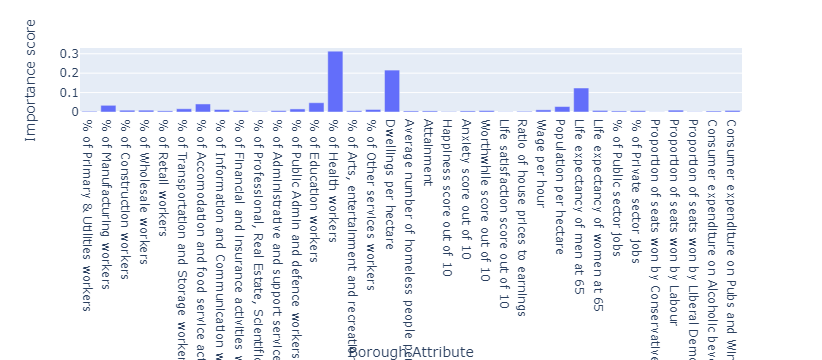

In [17]:
# Get the feature importances
importances = regressor.feature_importances_

# Create a bar chart using the px.bar() function
fig = px.bar(
    x=X_train.columns,
    y=importances,
    labels={'x': 'Borough Attribute', 'y': 'Importance score'}
)

# Show the plot
fig.show()


We can rank the plot above from lowest importance, to most important "Borough attribute".

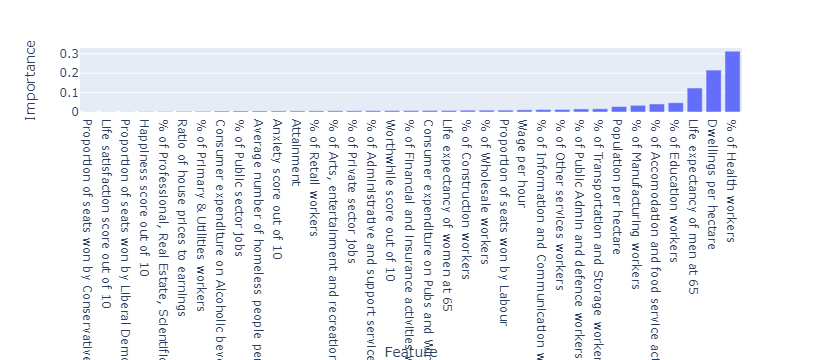

In [18]:

# Get the feature importances
importances = regressor.feature_importances_

# Sort the importance scores in ascending order
indices = np.argsort(importances)

# Get the column names in the correct order
cols = X_train.columns[indices]

# Create a bar chart using the px.bar() function
fig = px.bar(
    x=cols,
    y=importances[indices],
    labels={'x': 'Feature', 'y': 'Importance'}
)

# Save the figure as an HTML file
pio.write_html(fig, file='interactive_plot_htmls/ranked_importance_1999_2021.html')

# Show the plot
fig.show()


We can visualize the top 10 most important borough attribute's.

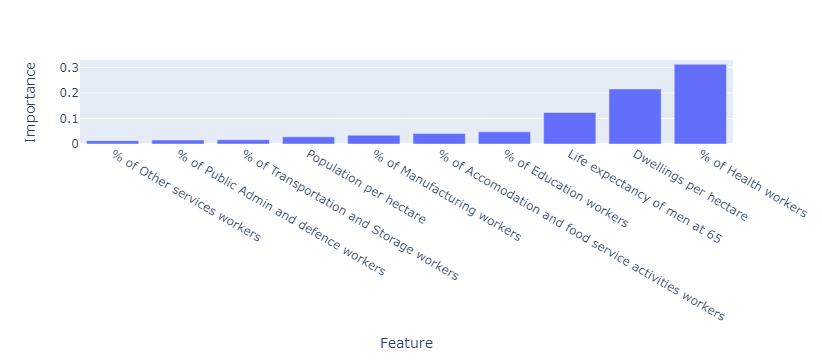

In [19]:
# Get the feature importances
importances = regressor.feature_importances_

# Sort the importance scores in ascending order
indices = np.argsort(importances)

# Get the column names in the correct order
cols = X_train.columns[indices]

# Get the top 10 most important features
top_10 = cols[-10:]

# Create a bar chart using the px.bar() function
fig = px.bar(
    x=top_10,
    y=importances[indices][-10:],
    labels={'x': 'Feature', 'y': 'Importance'}
)

# Save the figure as an HTML file
pio.write_html(fig, file='interactive_plot_htmls/ranked_top_10_importance_1999_2021.html')

# Show the plot
fig.show()


In [20]:
for i, feature in enumerate(reversed(top_10)):
    print(f"{i+1}. {feature}: {importances[indices][-i-1]}")


1. % of Health workers: 0.3131324516208583
2. Dwellings per hectare: 0.2158486800578927
3. Life expectancy of men at 65: 0.12359731072209178
4. % of Education workers: 0.04781248344860278
5. % of Accomodation and food service activities workers: 0.04138333192222088
6. % of Manufacturing workers: 0.03447704184669269
7. Population per hectare: 0.02809849989424336
8. % of Transportation and Storage workers: 0.016652689167924666
9. % of Public Admin and defence workers: 0.015817103974361816
10. % of Other services workers: 0.012992578149029727
